In [246]:
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import pandas as pd
from matplotlib import pyplot as plt

In [247]:
df = load_digits()

In [248]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

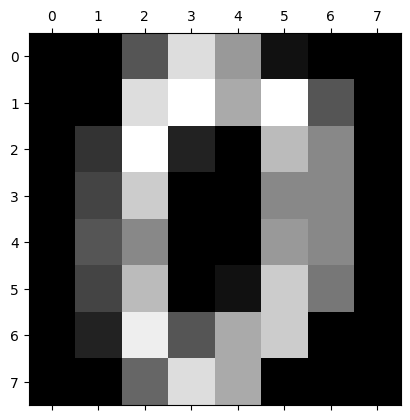

In [249]:
plt.gray()
plt.matshow(df.images[0])

In [250]:
X = pd.DataFrame(df.data)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [251]:
Y = df.target
Y

array([0, 1, 2, ..., 8, 9, 8])

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,test_size=0.1)

In [254]:
model = SVC(kernel='rbf')

In [255]:
model.fit(x_train,y_train)

SVC()

In [256]:
model.predict([df.data[55]])

array([0])

In [257]:
model.score(x_test,y_test)

0.9833333333333333

In [258]:
y_pre = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pre)
cm

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 17,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 25,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 22,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 19,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 18,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0, 24]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

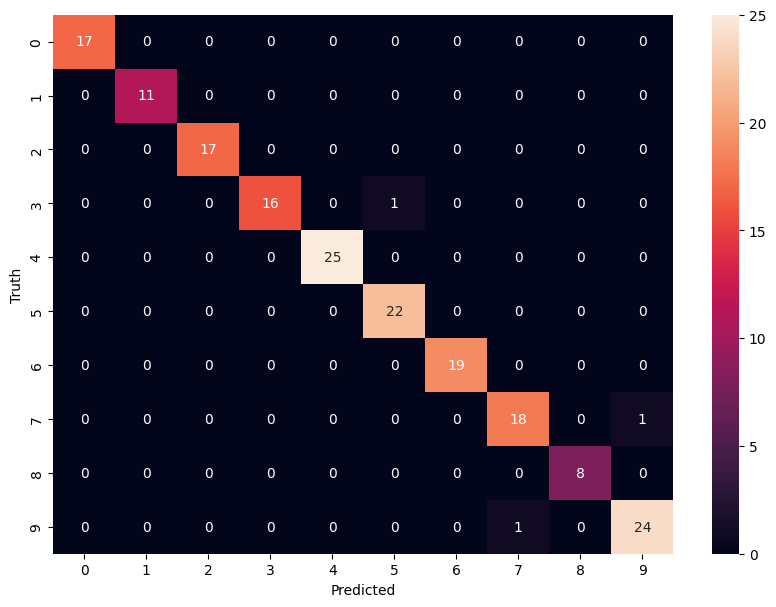

In [259]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')